In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap

%matplotlib inline

In [51]:
df = pd.read_csv('obitos_publico.csv', delimiter= ";", low_memory=False, error_bad_lines=False, encoding= "iso-8859-1", decimal=',')

In [52]:
df.rename(columns={'LAT_(GEO)':'Latitude','LONG_(GEO)':'Longitude'})
df.sample(5)

,Id da Delegacia (RDO),Número do Bo (RDO),Ano do BO (RDO),Data do Óbito,Data do Acidente,Tipo de via,Dia do óbito,Mês do Óbito,Mês Óbito Descrição,Ano do Óbito,...,Tipo do veículo da vítima,Tipo de vítima,Local do óbito,Tipo de acidente,Sub Tipo do Acidente,Sexo,Faixa etária,Idade da vítima,Outro Veículo Envolvido,Tempo entre o Acidente e o Óbito
6140,120401,567,2020,11/07/2020,11/07/2020,Rodovias,11,7,JULHO,2020,...,CAMINHAO,CONDUTOR,VIA,OUTROS,"QUEDA (ÁGUA, BARRANCO, PONTE)",MASCULINO,40-44,40,NÃO HÁ,Até 30 dias
8729,10353,7833,2019,27/12/2019,26/12/2019,Vias Municipais,27,12,DEZEMBRO,2019,...,PEDESTRE,PEDESTRE,ESTABELECIMENTO DE SAUDE,ATROPELAMENTO,NAO DISPONIVEL,MASCULINO,65-69,66,MOTOCICLETA,Até 30 dias
18383,120610,1332,2018,30/03/2018,25/03/2018,Rodovias,30,3,MARÇO,2018,...,NAO DISPONIVEL,NAO DISPONIVEL,ESTABELECIMENTO DE SAUDE,NAO DISPONIVEL,NAO DISPONIVEL,FEMININO,40-44,42,NAO DISPONIVEL,Até 30 dias
27833,100907,3085,2016,21/07/2016,21/07/2016,Rodovias,21,7,JULHO,2016,...,NAO DISPONIVEL,CONDUTOR,ESTABELECIMENTO DE SAUDE,OUTROS,NaN,MASCULINO,35-39,38,NaN,Até 30 dias
9934,70926,2857,2019,11/10/2019,11/10/2019,Rodovias,11,10,OUTUBRO,2019,...,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,CRUZANDO A VIA,MASCULINO,70-74,71,AUTOMOVEL,Até 30 dias


In [53]:
df.head(5)

,Id da Delegacia (RDO),Número do Bo (RDO),Ano do BO (RDO),Data do Óbito,Data do Acidente,Tipo de via,Dia do óbito,Mês do Óbito,Mês Óbito Descrição,Ano do Óbito,...,Tipo do veículo da vítima,Tipo de vítima,Local do óbito,Tipo de acidente,Sub Tipo do Acidente,Sexo,Faixa etária,Idade da vítima,Outro Veículo Envolvido,Tempo entre o Acidente e o Óbito
0,30427,4284,2021,30/09/2021,30/09/2021,Rodovias,30,9,SETEMBRO,2021,...,CAMINHAO,CONDUTOR,VIA,COLISAO,TRASEIRA,MASCULINO,50-54,54,CAMINHAO,Até 30 dias
1,120514,1766,2021,30/09/2021,30/09/2021,Rodovias,30,9,SETEMBRO,2021,...,MOTOCICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,COLISAO,TRASEIRA,MASCULINO,30-34,33,CAMINHAO,Até 30 dias
2,310101,1271,2021,30/09/2021,30/09/2021,Rodovias,30,9,SETEMBRO,2021,...,CAMINHAO,CONDUTOR,VIA,OUTROS,TOMBAMENTO VEÍCULO DE MAIS DE 2 RODAS,MASCULINO,40-44,41,NÃO HÁ,Até 30 dias
3,130508,3072,2021,30/09/2021,30/09/2021,Rodovias,30,9,SETEMBRO,2021,...,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,NAO DISPONIVEL,MASCULINO,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,Até 30 dias
4,130303,89,2021,30/09/2021,30/09/2021,Rodovias,30,9,SETEMBRO,2021,...,MOTOCICLETA,CONDUTOR,VIA,COLISAO,FRONTAL,MASCULINO,25-29,25,CAMINHAO,Até 30 dias


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37651 entries, 0 to 37650
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Id da Delegacia (RDO)             37651 non-null  int64 
 1   Número do Bo (RDO)                37651 non-null  int64 
 2   Ano do BO (RDO)                   37651 non-null  int64 
 3   Data do Óbito                     37651 non-null  object
 4   Data do Acidente                  37651 non-null  object
 5   Tipo de via                       37651 non-null  object
 6   Dia do óbito                      37651 non-null  int64 
 7   Mês do Óbito                      37651 non-null  int64 
 8   Mês Óbito Descrição               37651 non-null  object
 9   Ano do Óbito                      37651 non-null  int64 
 10  Ano/Mês do Óbito                  37651 non-null  object
 11  Dia da Semana                     37651 non-null  object
 12  Hora do Acidente  

In [55]:
df.query("Município == 'SAO JOSE DOS CAMPOS'")

,Id da Delegacia (RDO),Número do Bo (RDO),Ano do BO (RDO),Data do Óbito,Data do Acidente,Tipo de via,Dia do óbito,Mês do Óbito,Mês Óbito Descrição,Ano do Óbito,...,Tipo do veículo da vítima,Tipo de vítima,Local do óbito,Tipo de acidente,Sub Tipo do Acidente,Sexo,Faixa etária,Idade da vítima,Outro Veículo Envolvido,Tempo entre o Acidente e o Óbito
3,130508,3072,2021,30/09/2021,30/09/2021,Rodovias,30,9,SETEMBRO,2021,...,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,NAO DISPONIVEL,MASCULINO,NAO DISPONIVEL,NAO DISPONIVEL,NAO DISPONIVEL,Até 30 dias
169,130315,465,2021,16/09/2021,16/09/2021,Rodovias,16,9,SETEMBRO,2021,...,MOTOCICLETA,CONDUTOR,VIA,COLISAO,TRASEIRA,MASCULINO,18-24,20,AUTOMOVEL,Até 30 dias
170,130324,1079,2021,16/09/2021,16/09/2021,Rodovias,16,9,SETEMBRO,2021,...,MOTOCICLETA,CONDUTOR,VIA,COLISAO,NAO DISPONIVEL,MASCULINO,25-29,25,CAMINHAO,Até 30 dias
178,130315,463,2021,15/09/2021,15/09/2021,Rodovias,15,9,SETEMBRO,2021,...,PEDESTRE,PEDESTRE,ESTABELECIMENTO DE SAUDE,ATROPELAMENTO,NAO DISPONIVEL,MASCULINO,NAO DISPONIVEL,NAO DISPONIVEL,NÃO HÁ,Até 30 dias
249,130312,682,2021,10/09/2021,10/09/2021,Rodovias,10,9,SETEMBRO,2021,...,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,CRUZANDO A VIA,MASCULINO,NAO DISPONIVEL,NAO DISPONIVEL,AUTOMOVEL,Até 30 dias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37359,130312,383,2015,16/01/2015,16/01/2015,Vias Municipais,16,1,JANEIRO,2015,...,PEDESTRE,PEDESTRE,ESTABELECIMENTO DE SAUDE,ATROPELAMENTO,NaN,MASCULINO,30-34,31,NaN,Até 30 dias
37446,130312,245,2015,11/01/2015,11/01/2015,Vias Municipais,11,1,JANEIRO,2015,...,MOTOCICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,COLISAO,NaN,MASCULINO,18-24,23,NaN,Até 30 dias
37462,130312,218,2015,10/01/2015,10/01/2015,Rodovias,10,1,JANEIRO,2015,...,AUTOMOVEL,CONDUTOR,VIA,COLISAO,NaN,MASCULINO,40-44,40,NaN,Até 30 dias
37475,130312,244,2015,10/01/2015,10/01/2015,Vias Municipais,10,1,JANEIRO,2015,...,MOTOCICLETA,NAO DISPONIVEL,ESTABELECIMENTO DE SAUDE,NAO DISPONIVEL,NaN,MASCULINO,40-44,41,NaN,Até 30 dias


In [56]:
selecionados = ['Data do Óbito','Data do Acidente','Mês Óbito Descrição','Ano do Óbito','Município','Logradouro','LAT_(GEO)','LONG_(GEO)','Tipo do veículo da vítima','Tipo de vítima','Tipo de acidente','Sexo','Faixa etária']
acidSelecionados = df.filter(items=selecionados)

In [57]:
acidSelecionados.head(5)

,Data do Óbito,Data do Acidente,Mês Óbito Descrição,Ano do Óbito,Município,Logradouro,LAT_(GEO),LONG_(GEO),Tipo do veículo da vítima,Tipo de vítima,Tipo de acidente,Sexo,Faixa etária
0,30/09/2021,30/09/2021,SETEMBRO,2021,CARAPICUIBA,SP 021,"-23,5327","-46,8182",CAMINHAO,CONDUTOR,COLISAO,MASCULINO,50-54
1,30/09/2021,30/09/2021,SETEMBRO,2021,ARACARIGUAMA,SP 280,"-23,4315","-47,1269",MOTOCICLETA,CONDUTOR,COLISAO,MASCULINO,30-34
2,30/09/2021,30/09/2021,SETEMBRO,2021,CAJATI,BR 116,"-24,8170","-48,2105",CAMINHAO,CONDUTOR,OUTROS,MASCULINO,40-44
3,30/09/2021,30/09/2021,SETEMBRO,2021,SAO JOSE DOS CAMPOS,SP 099,"-23,2143","-45,8822",PEDESTRE,PEDESTRE,ATROPELAMENTO,MASCULINO,NAO DISPONIVEL
4,30/09/2021,30/09/2021,SETEMBRO,2021,MONTEIRO LOBATO,SP 050,"-22,9960","-45,8523",MOTOCICLETA,CONDUTOR,COLISAO,MASCULINO,25-29


<AxesSubplot:title={'center':'Número de Óbitos em São José dos Campos - de 2016 a 2021*'}, xlabel='Anos', ylabel='Número de Óbitos'>

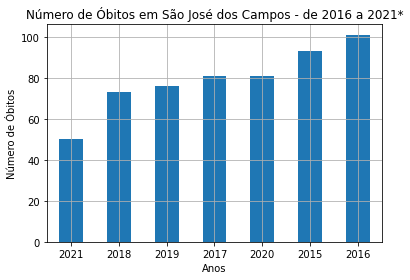

In [58]:
df.query('Município == "SAO JOSE DOS CAMPOS"')['Ano do Óbito'].value_counts(ascending=True).head(10).plot(kind="bar",
                                                                                                         title="Número de Óbitos em São José dos Campos - de 2016 a 2021*",
                                                                                                         xlabel="Anos",
                                                                                                         ylabel="Número de Óbitos",
                                                                                                         rot=0,
                                                                                                         grid=True)

In [59]:
#Ano de 2021 com dados somente até o mês de Setembro
df.query('Município == "SAO JOSE DOS CAMPOS"')['Faixa etária'].value_counts().head()

18-24    117
30-34     57
25-29     53
35-39     42
40-44     41
Name: Faixa etária, dtype: int64

In [60]:
df.query('Município == "SAO JOSE DOS CAMPOS"')['Ano do Óbito'].value_counts().head()

2016    101
2015     93
2017     81
2020     81
2019     76
Name: Ano do Óbito, dtype: int64

In [61]:
df.query('Município == "SAO JOSE DOS CAMPOS"')['Tipo de acidente'].value_counts().head()

COLISAO           165
ATROPELAMENTO     160
CHOQUE             95
OUTROS             69
NAO DISPONIVEL     65
Name: Tipo de acidente, dtype: int64

<AxesSubplot:title={'center':'Número de Óbitos em São José dos Campos, por sexo, - de 2016 a 2021*'}, xlabel='Sexo das vítimas', ylabel='Número de óbitos'>

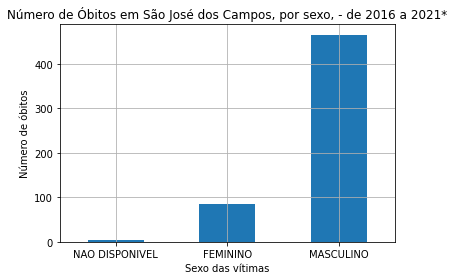

In [62]:
df.query('Município == "SAO JOSE DOS CAMPOS"')['Sexo'].value_counts(ascending=True).head(10).plot(kind="bar",
                                                                                                         title="Número de Óbitos em São José dos Campos, por sexo, - de 2016 a 2021*",
                                                                                                         xlabel="Sexo das vítimas",
                                                                                                         ylabel="Número de óbitos",
                                                                                                         rot=0,
                                                                                                         grid=True)

In [63]:
mapa = folium.Map(
    location=[-23.21431108,-45.88216967],
    zoom_start=14)

folium.Marker(
    [-23.21431108,-45.88216967],
    popup="Ocorrência").add_to(mapa)
mapa

In [64]:
ocorr_sjc=['Tipo de acidente','LAT_(GEO)','LONG_(GEO)']
ocorr_sjc_select = df.filter(items=ocorr_sjc)

In [65]:
ocorr_sjc_select.head(5)

,Tipo de acidente,LAT_(GEO),LONG_(GEO)
0,COLISAO,"-23,5327","-46,8182"
1,COLISAO,"-23,4315","-47,1269"
2,OUTROS,"-24,8170","-48,2105"
3,ATROPELAMENTO,"-23,2143","-45,8822"
4,COLISAO,"-22,9960","-45,8523"


In [66]:
newocorr_sjc = ocorr_sjc_select.rename(columns = {'LAT_(GEO)': 'Latitude', 'LONG_(GEO)': 'Longitude'}, inplace = True)


In [67]:
newocorr_sjc.head(5)

AttributeError: 'NoneType' object has no attribute 'head'